# AMAT 502: Modern Computing for Mathematicians
## Lecture 20 - Naive Bayes Classifier
### University at Albany SUNY

# Topics for Today

* Review of Probability
* Bayes' Rule
* Bayesian Classification
* Example from the Newsgroup Data Set

## Naive Bayes Classifier at a Glance

* In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write using conditional probability. Naive Bayes models are a group of very fast and simple classification algorithms that are suitable for high-dimensional datasets.

* In order to use Bayes' Theorem we need to make some *naive* assumptions about how the data is generated, i.e., that the data is drawn from a particularly nice distribution.

# Probability Review

- Kolmogorov's Axioms
- Measure
- Conditional Probability
- Bayes Theorem

## Kolmogorov's Axioms

In the 1930s, Andrey Kolomogorov [established a foundation for the theory of probability](https://en.wikipedia.org/wiki/Probability_axioms).

This involved the formalization of the notion of an **event**, which is basically a "nice" subset of some sample space $\Omega$ and a function $P$ that assigns the probability to each event. This means that we need three things to define a probability space:

- A sample space $\Omega$
- A collection of subsets $\mathcal{E}$ of $\Omega$.
- A function $P: \mathcal{E} \to \mathbb{R}$

Kolmogorov defined three axioms that these things must satisfy:

1. **Probability is non-negative** i.e. For any $E\in \mathcal{E}$, $P(E)\geq 0$.
2. **Probability of the Sample Space is 1**, i.e. $\Omega\in \mathcal{E}$ and $P(\Omega)=1$.
3. **Probability is Additive for Countable Disjoint Events**, i.e. If 
$$A_1, A_2, A_3, \ldots, A_n, \ldots \qquad \text{where} \qquad i\neq j \Rightarrow A_i\cap A_j = \varnothing$$
then
$$P(\bigcup_{i=1}^\infty A_i) = \sum_{i=1}^{\infty} P(A_i).$$

<center>
<img src="eventA.png" alt="Event A" width="400" style="float: left; margin: left 40px;"/>
<img src="eventB.png" alt="Event B" width="400" style="float: right; margin: right 40px; "/>
<center/>

## Probability as a Normalized Measure

The consequence of the Kolmogorov's Axioms is that the collection of events $\mathcal{E}$, which is by definition a collection of subsets of $\Omega$ is a **$\sigma$-algebra**, i.e.
- $\Omega\in \mathcal{E}$
- it is closed under complements so $A\in \mathcal{E} \Rightarrow A^c \in \mathcal{E}$ where $A^c:=\Omega\setminus A$
- it is closed under countable unions.

These are the ingredients that go into defining a **measure space**, which is basically the abstract study of how we can make the notion of volume, a la Calculus, make sense.

If we have a notion of volume/measure $|\bullet|:\mathcal{E} \to \mathbb{R}_{\geq 0}$ then we can turn this into a probability measure by division:

$$P(A) = \dfrac{|A|}{|\text{Universe}|}$$

$$P(B) = \dfrac{|B|}{|\text{Universe}|}$$

## Boolean Algebra

The term **sigma algebra** is a stronger requirement than a **Boolean** algebra.

Normally we think of algebra as being about multiplication and addition and things like that. There is a precise analogy between algebraic operations such as multiplication and addition and the set-theoretic operations:

- **AND** written $A \cap B$ or $A\cdot B$ (*think multiplication!*) is the event where both $A$ and $B$ occur.
- **OR** written $A\cup B$ is the event where either $A$ or $B$ occur; you're *adding* the possibility of $B$ occuring to $A$.

A **boolean** algebra also has the operation
- **NOT** written $A^c$, which is where $A$ does NOT occur.

We thus have the following "rules" of probability:
    
$$P(A \cap B) = \dfrac{|A \cap B|}{|\text{Universe}|} $$

$$P(A^c) = 1- P(A)$$
<center>
    <img src="cond1.png" alt="Conditional Probability" width="600"/>
</center>

## Conditional Probability

We can always take a collection of events and **condition** on another event happening, i.e. we restrict discourse to a smaller universe where we know event $B$ has already occured.

This allows us to pass from the probability space $(\Omega, \mathcal{E}, P(\bullet))$ to another probability space $(B, \mathcal{E}\cap B, P(\bullet \mid B))$, where

$$P(A | B) = \dfrac{P(A \cap B)}{P(B)} $$

<center>
    <img src="cond2.png" alt="Bayes Theorem" width="300"/>
</center>

## Law of Multiplication

Similarly to calculate the probability of $B$ occuring given that $A$ has:

$$ P(B | A) = \dfrac{P(A \cap B)}{P(A)} $$

or, equivalently

$$ P(B | A)P(A) = P(A \cap B)$$

## Bayes' Rule

By Rearranging terms we get the simplest version of Bayes' theorem:

![bayes-rule](bayes-rule.jpg)
*By mattbuck (category) - Own work by mattbuck., CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=14658489*

The image reads:
$$P(A | B) = \dfrac{P(B | A)P(A)}{P(B)} $$


# Bayesian Probability

![Thomas Bayes](Thomas_Bayes.gif)

**Thomas Bayes** (1701 – 1761 CE) was a British statistician, philosopher and Presbyterian minister.

**Bayesian Probability** takes the perspective that we should interpret the function $P(\bullet)$ as representing *degress of belief* in an event occurring.

By contrast, **frequentist probability** takes the perspective that probability represents the frequency of occurrence when an experiment is repeated multiple times.

Bayesian probability makes more sense when you're considering questions such as *What is the Probability of Life on Mars?* 

Additionally, Bayesian probability has become the preferred framework for doing data science.

## Bayesian Terminology

Part of what makes Bayesian probability different is that you need some terminology that allows you to interpret the components of Bayes' Rule:

$$P(A | B) = \dfrac{P(B | A)P(A)}{P(B)} $$


* P(A|B) is the **posterior probability** of class (A, target) given predictor (B, attributes).
* P(B) is the **prior probability** of predictor.
* P(B|A) is the **likelihood** which is the probability of predictor given class.
* P(A) is the **prior probability** of class.

[See these MIT 18.05 Notes for this translation](https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading20.pdf)

## Bayesian Classification
In Bayesian classification methods, we're interested in finding the probability of a label given some observable features, i.e., by Bayes Theorem:

$$P(L | \text{features}) = \dfrac{P(\text{features} | L)P(L)}{P(\text{features})} $$

More specifically, if we have $n$ features, $x_1, \cdots x_n$, and $k$ labels, $y_1, \cdots, y_k$ then the *posterior probability* of $y_i$ given $x_1, \cdots x_n$

$$P(y_i | x_1, x_2, \cdots, x_n) = \dfrac{P(x_1, x_2, \cdots, x_n | y_i)P(y_i)}{P(x_1, x_2, \cdots, x_n)}$$


## Problems with Bayesian Classification

The prior $P(y_i)$ is easy to estimate from a dataset, simply by looking at frequency of its occurrence. 

The conditional probability of the observation based on the class $$P(x_1, x_2, \cdots, x_n | y_i)$$ is not feasible unless the number of examples is extraordinarily large, e.g. large enough to effectively estimate the probability distribution for all different possible combinations of values.

As such, the direct application of Bayes Theorem also becomes intractable, especially as the number of variables or features $n$ increases.

## The "Naive" Bayesian Assumption

We can circumvent these problems with **naive** assumptions on our data. This is why **Naive Bayes Classifier** is called by this name.

In order to use and simplify the application and computation of Bayes Theorem, we assume that:

* The data input values (the features) are independent, and

* The data is used to estimate the parameters of a single probability distribution

## Naive Bayes Independence Assumption

If we assume that the features are conditionally independent, then we can say

$$P(y_i | x_1, x_2, …, x_n) \propto P(x_1|y_i) \times P(x_2|y_i) \times \cdots P(x_n|y_i) \times P(y_i)$$

where we have forgotten the normalizing factor of $P(x_1, x_2, \cdots, x_n)$.

### Conceptual Question
If we were trying to classify a sample, how should we choose which label to use given features $x_1,\cdots, x_n$?

## Naive Bayes Distributions

**Example of distributions given a specific type of classification:**

* **Binary:** Binomial distribution.
* **Categorical:** Multinomial distribution.
* **Numeric:** Gaussian distribution.

## Multinomial Distribution

When using the Multinomial Naive Bayes method, we assume that the features are assumed to be generated from a simple multinomial distribution. 

The multinomial distribution describes the probability of observing counts among a number of categories. One example of this distribution is the one that governs how many balls are in one of three urns. This generalizes binomial distributions because there are more than two outcomes.

Another example of such a classification would be classifying text that comes from one of several possible news forums

# The Newsgroups Data Set

The dataset we are going to explore is the **20 newsgroups dataset** which has around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon messages posted before and after a specific date.

In [3]:
# Import data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
# Select a smaller collection of categories
categories = ['talk.religion.misc', 'soc.religion.christian','sci.space','comp.graphics']
train = fetch_20newsgroups(subset = 'train', categories = categories)
test = fetch_20newsgroups(subset = 'test', categories = categories)

In [26]:
# Check out the data
#print(train.data[100])
#print(train.target[100])
#categories[0]
train.target[0:20]

array([2, 2, 1, 2, 0, 3, 1, 0, 3, 3, 2, 0, 1, 2, 3, 2, 2, 0, 1, 0])

## Term Frequence-Inverse Document Frequency

In order to use this data, we need to vectorize it, i.e., convert the content of each string into a vector of numbers. One approach that we will use the *term frequency-inverse document frequency* (TF-IDF), which weighs the word counts by a measure of how often they appear in the documents.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [27]:
# Apply the model to the training data 
model.fit(train.data, train.target)
# Predict labels for the test data
labels = model.predict(test.data)

Text(52.893125000000005, 0.5, 'predicted label')

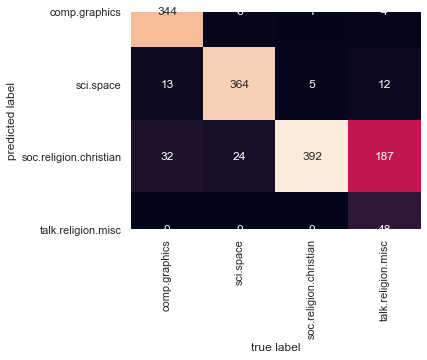

In [28]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, 
            xticklabels = train.target_names, yticklabels = train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [29]:
# Define a function that will return the prediction label of a single string
def predict_category(s, train = train, model = model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [37]:
# Predict labels
print(predict_category('sending a spaceship somewhere'))
print(predict_category('discussing islam vs atheism'))
print(predict_category('determining the screen resolution'))
print(predict_category('Beyonce is one of the lizard people'))
print(predict_category('math'))

sci.space
soc.religion.christian
comp.graphics
soc.religion.christian
soc.religion.christian


## When to use Naive Bayes

* When the naive assumptions match the data

* For very well separated categories, when the model complexity is less important

* For very high-dimensional data, when the model complexity is less important

## Resources:

* https://oscarbonilla.com/2009/05/visualizing-bayes-theorem/

* https://github.com/jakevdp/PythonDataScienceHandbook